In [1]:
#importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

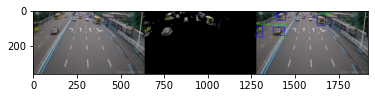

In [6]:
# read video
video = cv2.VideoCapture('cars.mp4')

kernel = None

# Initialize the background object and set  detect shadows as False
object_bg = cv2.createBackgroundSubtractorMOG2(detectShadows = False)

while True:
    
    ret, frame = video.read()
    if not ret:
        break

    
    fgmask = object_bg.apply(frame)
   
    
    _, fgmask = cv2.threshold(fgmask, 250, 255, cv2.THRESH_BINARY)
    
    # Apply erosion and dialation
    fgmask = cv2.erode(fgmask, kernel, iterations = 1)
    fgmask = cv2.dilate(fgmask, kernel, iterations = 2)
    
    # Detect contours in the frame.
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the frame to draw bounding boxes around the detected cars.
    frameCopy = frame.copy()
    
    # loop over each contour
    for cnt in contours:
        
        # Make sure the contour area is somewhat higher than some threshold to make sure its a car and not some noise.
        if cv2.contourArea(cnt) > 500:
            
            # Retrieve the bounding box coordinates from the contour.
            x, y, width, height = cv2.boundingRect(cnt)
            
            # Draw a bounding box around the car.
            cv2.rectangle(frameCopy, (x , y), (x + width, y + height),(0, 0, 255), 2)
            
            cv2.putText(frameCopy, 'Vehicle Detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0), 1, cv2.LINE_AA)
    
    # Extract the foreground from the frame using the segmented mask.
    foregroundPart = cv2.bitwise_and(frame, frame, mask=fgmask)
        
    # Stack the original frame, extracted foreground, and annotated frame. 
    stacked = np.hstack((frame, foregroundPart, frameCopy))
    plt.imshow(stacked)

    # Display the stacked image with an appropriate title.
    cv2.imshow('Original Frame, Extracted Foreground and Detected Cars', cv2.resize(stacked, None, fx=0.6, fy=0.6))
   
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
   
  #cv2_imshow(stacked)
    k = cv2.waitKey(1) & 0xff
    
    # Check if 'q' key is pressed.
   
    if k == ord('q'):
        
        # Break the loop.
        break

# Release the VideoCapture Object.
video.release()

# Close the windows.q
cv2.destroyAllWindows()